### Treść zadania

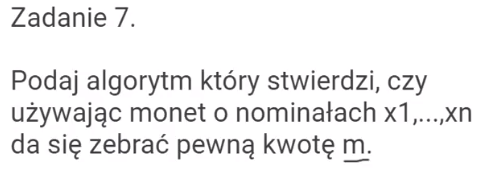

### Omówienie

Analogiczne do minimalnej liczby monet, jakie należy użyć, aby rozmienić daną kwotę. Można nieco uprościć ten algorytm, ponieważ tym razem nie interesuje nas liczba monet, a jedynie fakt, czy da się zebrać daną kwotę. Zatem naszą funkcją rekurencyjną będzie funkcja: <br>
$ f(i) $ - wartość $ True $, jeżeli da się zebrać kwotę $ i $ lub wartość $ False $, jeżeli nie da się.
###### UWAGA:
Choć nie jest to wprost powiedziane, w takich zadaniach z monetami zakładamy zawsze, że zarówno kwota, jak i nominały, są wyrażone liczbami naturalnymi dodatnimi. Jeżeli otrzymalibyśmy nominały np. groszowe, a kwotę w złotówkach, przykładowo nominały wyrażone w złotówkach to: $ [0.02, 0.05, 0.10, 0.20, 0.50, 1, 2, 5, 10] $, a kwota to $ 127.69 $, wystarczyłoby przeskalować wszystkie wartości do liczb naturalnych, mnożąc w tym przypadku np. przez 100. Oczywiście spada wówczas wydajność algorytmu, bo mamy znacznie większe liczby, więc trzeba wykonać więcej obliczeń.
###### UWAGA:
Zakładam, że w tablicy nominałów żadne 2 nominały się nie powtarzają. Jeżeli jednak by występowały powtórki, warto je odfiltrować, aby nie sprawdzać wielokrotnie rozwiązania przy wzięciu monety o tym samym nominale. Możemy albo utworzyć nową tablicę z nominałami, która już nie zawiera powtórek (rozwiązanie łatwiejsze), albo poprzestawiać nominały w tablicy w taki sposób, że powtórki lądują na koniec, a do pewnego indeksu $ i $ mamy wszystkie niepowtarzające się wartości

##### Utworzenie nowej tablicy bez powtórek

    def filter_repetitions(A):
        A.sort()
        res = [A[0]]
        for i in range(1, len(A)):
            if A[i] != A[i - 1]:
                res.append(A[i])
        return res

##### Przeniesienie powtórek na koniec

    def move_repetitions(A):
        A.sort()
        i = 1
        for j in range(1, len(A)):
            if A[j] != A[i - 1]:
                A[j], A[i] = A[i], A[j]
                i += 1
        return i - 1  # Return an index of the last non-repeated value

### Złożoność

###### Obliczeniowa
$ O(a \cdot c) $, gdzie $ a $ - zbierana kwota, $ c $ - liczba nominałów w tablicy $ C $
###### Pamięciowa
$ O(a) $

### Implementacja

In [1]:
def can_raise_money(amount: 'desired amount', C: 'array of nominals (coins)'):
    F = [False] * (amount + 1)
    F[0] = True  # We can always raise an amount of 0
    # Sort nominals in order to check the lowest first
    C.sort()
    
    for i in range(1, amount + 1):
        for c in C:
            # Break if the current nominal is too large
            if c > i: break
            F[i] = F[i - c]
            if F[i]: break
    
    return F[amount]

###### Kilka testów

In [2]:
amount = 17
coins = [2, 5]
print(can_raise_money(amount, coins))

True


In [3]:
amount = 17
coins = [2, 7]
print(can_raise_money(amount, coins))

True


In [4]:
amount = 17
coins = [2, 10]
print(can_raise_money(amount, coins))

False
